# Polish 2020 vote

Based on https://github.com/khakhalin/Sketches/tree/master/ru_vote_2020

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
def make_int(val):
    if val == '-':
        return 0
    else:
        return int(val)
    
df = pd.read_csv('wyniki_gl_na_kand_po_obwodach_utf8.csv',
                 sep=";", quoting=2, low_memory=False,
                 dtype={
                     'Województwo': str,
                 },
                 converters={
                     'Andrzej Sebastian DUDA': make_int,
                     'Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów': make_int,
                     'Liczba wyborców uprawnionych do głosowania': make_int},
                 usecols=[
                     'Typ gminy',
                     'Gmina',
                     'Powiat',
                     'Województwo',
                     'Andrzej Sebastian DUDA',
                     'Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów',
                     'Liczba wyborców uprawnionych do głosowania',
                 ])
df['turnout'] = df['Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów']/np.maximum(1, df['Liczba wyborców uprawnionych do głosowania'])
df['support'] = df['Andrzej Sebastian DUDA']/np.maximum(1, df['Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów'])
df.head()

,Typ gminy,Gmina,Powiat,Województwo,Liczba wyborców uprawnionych do głosowania,Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów,Andrzej Sebastian DUDA,turnout,support
0,gmina miejska,m. Bolesławiec,bolesławiecki,dolnośląskie,1522,992,480,0.651774,0.483871
1,gmina miejska,m. Bolesławiec,bolesławiecki,dolnośląskie,1314,898,362,0.683409,0.403118
2,gmina miejska,m. Bolesławiec,bolesławiecki,dolnośląskie,1399,934,401,0.667620,0.429336
3,gmina miejska,m. Bolesławiec,bolesławiecki,dolnośląskie,1385,952,400,0.687365,0.420168
4,gmina miejska,m. Bolesławiec,bolesławiecki,dolnośląskie,1338,894,375,0.668161,0.419463


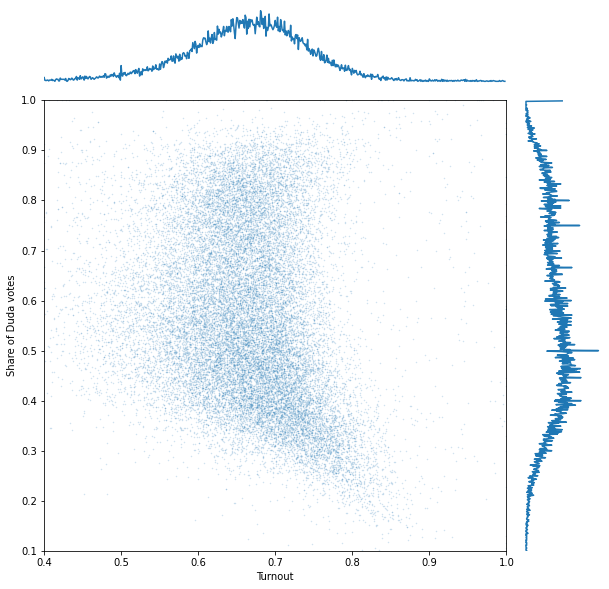

In [55]:
limits = [0.4, 0.1]
f = plt.figure(figsize=(10,10), facecolor='white')
gs = f.add_gridspec(6, 6)

ax = f.add_subplot(gs[0, :-1])
x = np.histogram(df['turnout'].values, bins=1000, range=(0,1))
ax.plot(x[1][:-2], x[0][:-1]); # Very last bin is full of 100% for tiny polling points
ax.axis('off')
plt.xlim(limits[0], 1);

ax = f.add_subplot(gs[1:, -1])
x = np.histogram(df['support'].values, bins=1000, range=(0,1))
ax.plot(x[0][:], x[1][:-1]); # Very last bin is full of 100% for tiny polling points
ax.axis('off')
plt.ylim(limits[1], 1);

ax = f.add_subplot(gs[1:, :-1])
ax.plot(df['turnout'], df['support'], '.', markersize=1, alpha=0.2);
plt.xlabel('Turnout');
plt.ylabel('Share of Duda votes');
plt.xlim(limits[0], 1);
plt.ylim(limits[1], 1);

In [56]:
df['Typ gminy'].unique()

array(['gmina miejska', 'gmina wiejska', 'gmina miejsko-wiejska',
       'dzielnica w m.st. Warszawa', 'statki', 'zagranica', nan],
      dtype=object)

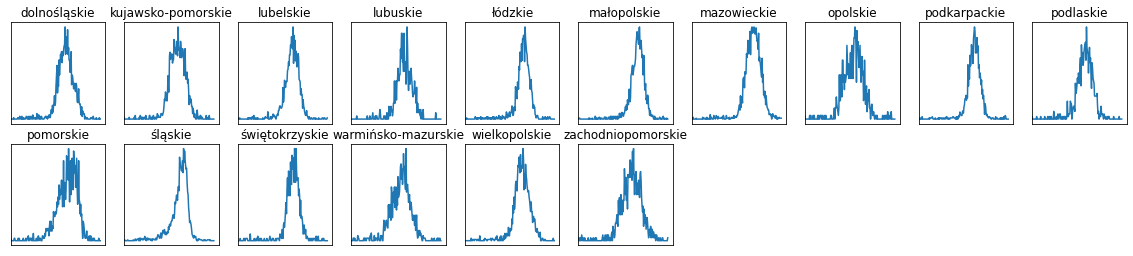

In [57]:
# Distributions by region
regions = df['Województwo'].unique()[:-1]
if False: # If we want to sort them by turnout
    dfsum = df.groupby('Województwo').agg({'turnout': [np.mean]})
    ind = np.argsort(dfsum.iloc[:,0].values) # Indices from lowest mean turnout to highest
    regions = regions[ind]

plt.figure(figsize=(20,22))
for i in range(len(regions)):
    region = regions[i]
    x = np.histogram(df['turnout'][df['Województwo']==region].values, bins=200, range=(0,1))
    plt.subplot(10, 10, i+1);
    plt.plot(x[1][:-2], x[0][:-1]/np.max(x[0][:-1]));
    plt.xticks([])
    plt.yticks([])
    plt.xlim(0.1)
    plt.title(region)

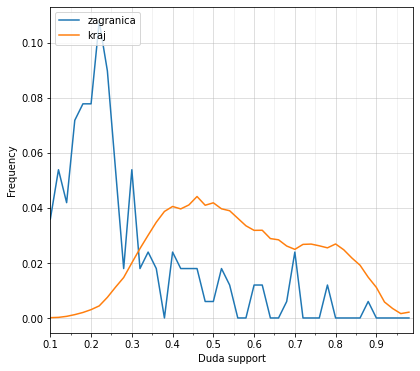

In [58]:
# One region of interest

category = 'support'

plt.figure(figsize=(6.5, 6), facecolor='white')
ax = plt.subplot(111)
for foo in range(2):
    if foo == 0:
        df1 = df[:][df['Typ gminy'] == 'zagranica']
        lab = 'zagranica'
    else:
        df1 = df[:][df['Typ gminy'] != 'zagranica']
        lab = 'kraj'
    x = np.histogram(df1[category].values, bins=50, range=(0,1))
    plt.plot(x[1][:-1], x[0]/np.sum(x[0]), label=lab)
    ax.set_xticks(np.arange(0,1.1,0.1))
    ax.set_xticks(np.arange(0,1,0.05), minor=True)
    plt.grid(which='minor', alpha=0.2)
    plt.grid(which='major', alpha=0.5)
    if category=='support':
        plt.xlabel('Duda support')
    else:
        plt.xlabel('Turnout')
    plt.ylabel('Frequency')
    #plt.title(region_name);
plt.xlim(0.1, 0.99)
plt.legend(loc='upper left');

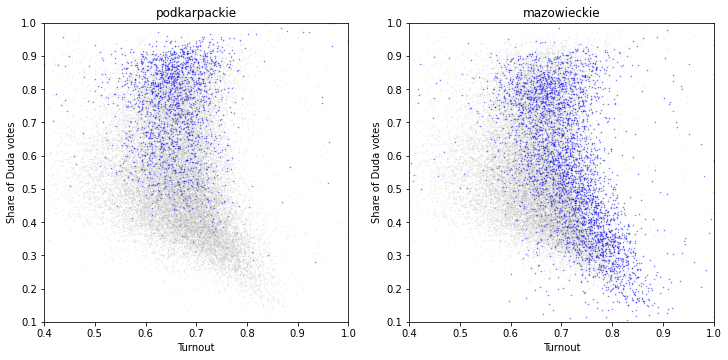

In [59]:
# Selected regions only

regions = ['podkarpackie', 'mazowieckie']

limits = [0.4, 0.1]
f = plt.figure(figsize=(12,5.5), facecolor='white')

for i in range(len(regions)):
    plt.subplot(1,len(regions),i+1);
    region = regions[i]
    ind = (df['Województwo'] == region)
    plt.plot(df.turnout, df.support, '.', markersize=1, color='gray', alpha=0.1);
    plt.plot(df[ind].turnout, df[ind].support, '.', markersize=1, color='blue', alpha=0.5);
    plt.xlabel('Turnout');
    plt.ylabel('Share of Duda votes');
    plt.xlim(limits[0], 1);
    plt.ylim(limits[1], 1);
    plt.title(region);

In [60]:
filt = np.logical_and(df1.support>0.715, df1.support<0.73)
temp = df1[filt]
temp.iloc[np.argsort(temp.support.values)]

,Typ gminy,Gmina,Powiat,Województwo,Liczba wyborców uprawnionych do głosowania,Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów,Andrzej Sebastian DUDA,turnout,support
16803,gmina miejsko-wiejska,gm. Łapy,białostocki,podlaskie,1184,751,537,0.634291,0.715047
16795,gmina miejsko-wiejska,gm. Łapy,białostocki,podlaskie,1421,916,655,0.644616,0.715066
24872,gmina miejsko-wiejska,gm. Grabów nad Prosną,ostrzeszowski,wielkopolskie,293,172,123,0.587031,0.715116
24253,gmina wiejska,gm. Godziesze Wielkie,kaliski,wielkopolskie,1021,632,452,0.619001,0.715190
15216,gmina miejska,m. Jasło,jasielski,podkarpackie,731,453,324,0.619699,0.715232
...,...,...,...,...,...,...,...,...,...
12677,gmina wiejska,gm. Zabrodzie,wyszkowski,mazowieckie,1115,866,632,0.776682,0.729792
4382,gmina wiejska,gm. Wojciechów,lubelski,lubelskie,545,348,254,0.638532,0.729885
910,gmina wiejska,gm. Kostomłoty,średzki,dolnośląskie,798,522,381,0.654135,0.729885
11728,gmina wiejska,gm. Sochocin,płoński,mazowieckie,842,548,400,0.650831,0.729927
